In [1]:
import h5py
import numpy as np
import os
import pandas as pd
from pathlib import Path
import readgadget
import scipy
import subprocess
import time

from os import listdir
from os.path import isfile, join

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import SymLogNorm

%load_ext autoreload
%autoreload 2
import bacco
import bacco.probabilistic_bias as pb

import sys
sys.path.append('../code')
import utils

Importing pyfftw first


2024-06-01 12:06:11.304259: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 12:06:15.823268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 12:06:15.824905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 12:06:47.849076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-01 12:07:26.566889: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gp

In [21]:
matplotlib.pyplot.style.use('default')
matplotlib.pyplot.close('all')

matplotlib.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams['xtick.labelsize'] = 16 
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['lines.linewidth'] = 2

In [2]:
dir_out = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/samples'
fn_out = f'{dir_out}/Planck_Mil-I_snapshots_default_test1_z0.00-0.00_All.npy'
fn_out_tree = f'{dir_out}/Planck_Mil-I_snapshots_default_test1_z0.00-0.00_All_treefiles.npy'

In [3]:
gals = np.load(fn_out)
print(gals.shape)

(25913,)


In [4]:
gals[0]

(1, 150, 0., 58, 3836810.2, 1.318111e+12, 0.15624256, [-0.0824585 ,  0.04976654, -0.1722107 ], [148.47568 , 139.39218 ,  88.767235], [-369.11465,  278.6592 ,  546.3737 ], 56, 1.3847136e+11, 0.08824429, 82.14982, 81.99355, [0.00181816, 0.12735446, 0.0393335 ], [ 0.02960606,  0.12262588, -0.03046616], 8.610041e+08, [1.3320820e+05, 3.8910750e+05, 1.5079936e+06, 5.7567895e+06, 2.1378466e+07, 7.5573856e+07, 2.2394666e+08, 3.8936298e+08, 1.3615107e+08, 6.7921935e+06, 1.1736122e+04, 7.7748604e+01], 0.10290792, [0.4966232 , 0.48726895, 0.47688514, 0.46212146, 0.43933824, 0.3544332 , 0.19927724, 0.01069228, 0.        , 0.        , 0.        , 0.        ], 1.741217e+09, 1.681071e+09, 60145968., [1.3678775e+06, 3.8866802e+06, 1.4231156e+07, 4.9147904e+07, 1.5458914e+08, 4.0453197e+08, 6.5160422e+08, 2.8674256e+08, 7.9704280e+07, 3.2057356e+07, 3.1867322e+06, 2.1113670e+04], [ 3981576.8 ,  3478639.  ,  5798019.5 ,  8452148.  , 10195347.  ,  9817773.  ,  7703031.5 ,  5011774.  ,  2903285.5 ,  15698

In [40]:
list(gals.dtype.names)

['Type',
 'HaloIndex',
 'HaloM_Crit200',
 'SnapNum',
 'LookBackTimeToSnap',
 'CentralMvir',
 'CentralRvir',
 'DistanceToCentralGal',
 'Pos',
 'Vel',
 'Len',
 'Mvir',
 'Rvir',
 'Vvir',
 'Vmax',
 'ColdGasSpin',
 'DiskSpin',
 'ColdGas',
 'ColdGasRings',
 'H2fraction',
 'H2fractionRings',
 'StellarMass',
 'DiskMass',
 'BulgeMass',
 'DiskMassRings',
 'BulgeMassRings',
 'HotGas',
 'EjectedMass',
 'BlackHoleMass',
 'ICM',
 'MetalsColdGas',
 'MetalsColdGasRings',
 'MetalsStellarMass',
 'MetalsDiskMass',
 'MetalsBulgeMass',
 'MetalsDiskMassRings',
 'MetalsBulgeMassRings',
 'MetalsHotGas',
 'MetalsEjectedMass',
 'MetalsICM',
 'DiskSNIIRate',
 'BulgeSNIIRate',
 'ICMSNIIRate',
 'DiskSNIaRate',
 'BulgeSNIaRate',
 'ICMSNIaRate',
 'Sfr',
 'SfrInst',
 'SfrRings',
 'SfrInstRings',
 'SfrBulge',
 'BulgeSize',
 'DiskRadius',
 'ColdGasRadius',
 'StellarHalfMassRadius',
 'MassWeightAge',
 'DiskMass_elements',
 'BulgeMass_elements',
 'DiskMassRings_elements',
 'BulgeMassRings_elements',
 'ColdGas_elements',


In [9]:
print([gn for gn in gals.dtype.names])

['Type', 'HaloIndex', 'HaloM_Crit200', 'SnapNum', 'LookBackTimeToSnap', 'CentralMvir', 'CentralRvir', 'DistanceToCentralGal', 'Pos', 'Vel', 'Len', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'ColdGasSpin', 'DiskSpin', 'ColdGas', 'ColdGasRings', 'H2fraction', 'H2fractionRings', 'StellarMass', 'DiskMass', 'BulgeMass', 'DiskMassRings', 'BulgeMassRings', 'HotGas', 'EjectedMass', 'BlackHoleMass', 'ICM', 'MetalsColdGas', 'MetalsColdGasRings', 'MetalsStellarMass', 'MetalsDiskMass', 'MetalsBulgeMass', 'MetalsDiskMassRings', 'MetalsBulgeMassRings', 'MetalsHotGas', 'MetalsEjectedMass', 'MetalsICM', 'DiskSNIIRate', 'BulgeSNIIRate', 'ICMSNIIRate', 'DiskSNIaRate', 'BulgeSNIaRate', 'ICMSNIaRate', 'Sfr', 'SfrInst', 'SfrRings', 'SfrInstRings', 'SfrBulge', 'BulgeSize', 'DiskRadius', 'ColdGasRadius', 'StellarHalfMassRadius', 'MassWeightAge', 'DiskMass_elements', 'BulgeMass_elements', 'DiskMassRings_elements', 'BulgeMassRings_elements', 'ColdGas_elements', 'ColdGasRings_elements', 'HotGas_elements', 'ICM_elements', 

In [14]:
gals['HaloM_Crit200']

array([0.0000000e+00, 0.0000000e+00, 1.3181110e+12, ..., 3.9949267e+10,
       3.2815753e+10, 3.2815753e+10], dtype=float32)

In [52]:
np.min(gals['StellarMass'])/1e8

1.48593504

Text(0, 0.5, 'number per bin')

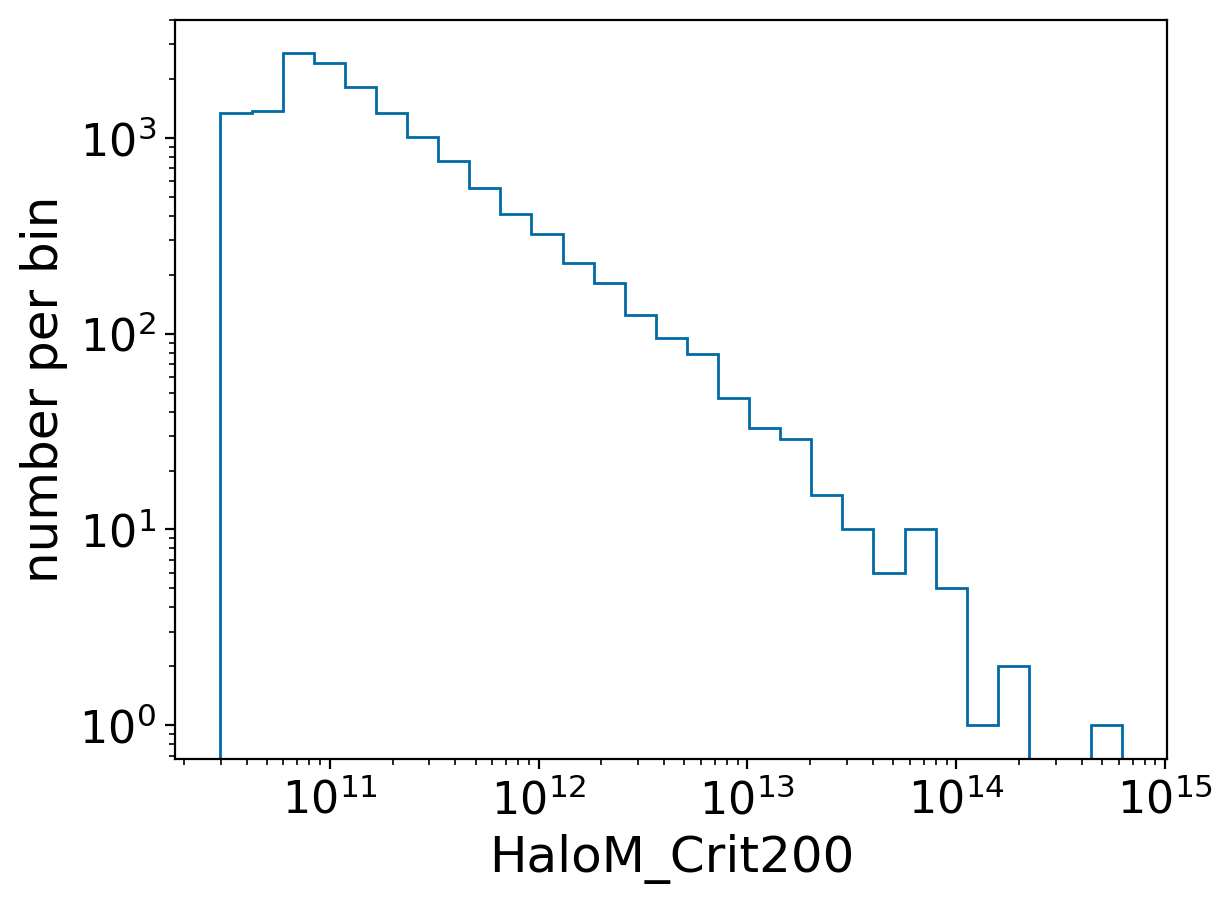

In [22]:
bins = np.logspace(np.log10(np.min(gals['HaloM_Crit200'][gals['HaloM_Crit200']>0])), 
                   np.log10(np.max(gals['HaloM_Crit200'][gals['HaloM_Crit200']>0])), 30)
plt.hist(gals['HaloM_Crit200'], histtype='step', bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HaloM_Crit200')
plt.ylabel('number per bin')


Text(0, 0.5, 'number per bin')

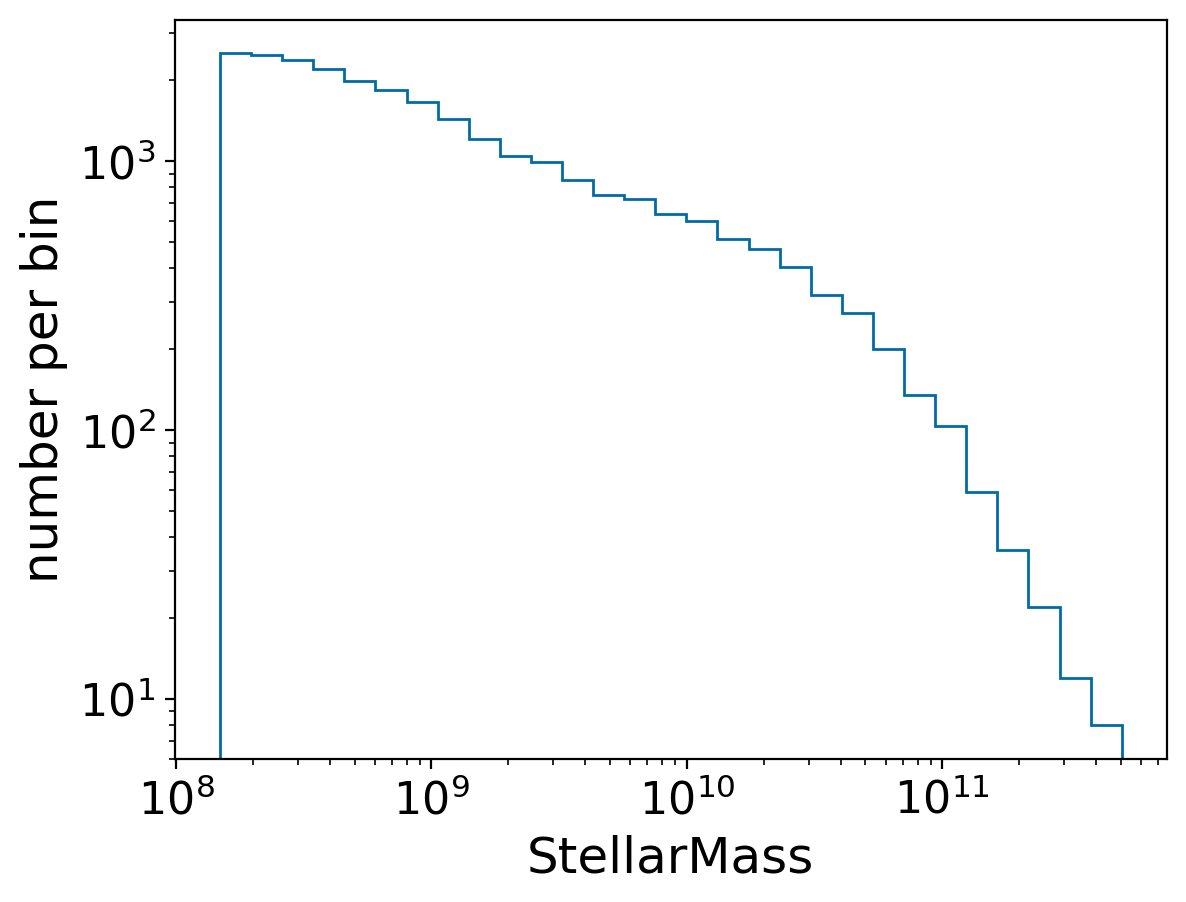

In [23]:
bins = np.logspace(np.log10(np.min(gals['StellarMass'])), np.log10(np.max(gals['StellarMass'])), 30)
plt.hist(gals['StellarMass'], histtype='step', bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('StellarMass')
plt.ylabel('number per bin')


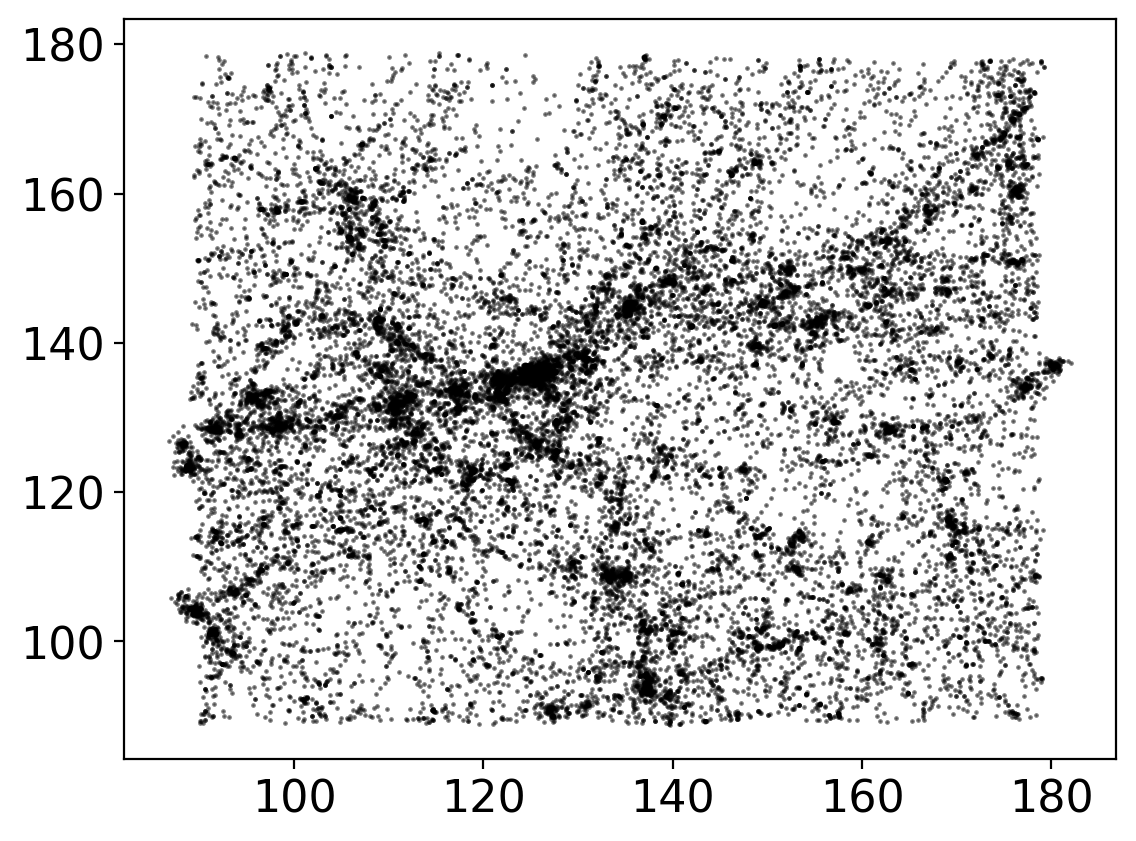

In [33]:
plt.scatter(gals['Pos'][:,0], gals['Pos'][:,1], s=2, alpha=0.5, marker='.', c='k')

In [38]:
np.min(gals['Pos'], axis=0), np.max(gals['Pos'], axis=0)

(array([86.83838 , 88.80708 , 88.511345], dtype=float32),
 array([182.0871 , 178.84761, 178.95128], dtype=float32))

In [39]:
np.max(gals['Pos'], axis=0) - np.min(gals['Pos'], axis=0)

array([95.24872, 90.04053, 90.43993], dtype=float32)

In [43]:
vol = np.product(np.max(gals['Pos'], axis=0) - np.min(gals['Pos'], axis=0))

775635.06

In [46]:
N_target = int(vol*0.003)
N_target

2326

In [50]:
m_min = np.sort(gals['StellarMass'])[-N_target]
print(f'{m_min:3e}')

1.483004e+10


In [41]:
480.279/95.24872 #hm, this would mean 5^3 patches = 125, but that doesnt get us to 511
# but 511 is a weird number so igual it's not even
# but this will be annoying to do halo subsets?? 

5.042366973540432

### Range of parameters

In [4]:
gal_arr = []

dir_base = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository'
dir_base_input = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/input'
model = 'modified' #'default'

vals_snII = np.arange(0.1, 1.0, 0.1)
print(vals_snII)

for val_snII in vals_snII:
    
    tag_lgal = f'_FracZSNIItoHot{val_snII:.1f}'

    dir_out = f'{dir_base}/output/output{tag_lgal}/samples'
    fn_out = f'{dir_out}/Planck_Mil-I_snapshots_{model}_test1_z0.00-0.00_All.npy'
    fn_out_tree = f'{dir_out}/Planck_Mil-I_snapshots_{model}_test1_z0.00-0.00_All_treefiles.npy'
    
    gals = np.load(fn_out)
    gal_arr.append(gals)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [21]:
box_size = 500.
h = 0.673 #from NEW COSMOLOGY in input file (??)
#vol_Mpc = (box_size/h)**3 # X Mpc/h = X/h Mpc

# from main_lgals.py:
# Volume = (BoxSideLength**3.0) * TreeFilesUsed / TotTreeFiles
TreeFilesUsed = 1
TotTreeFiles = 512
vol_Mpch = box_size**3 * TreeFilesUsed / TotTreeFiles
vol_Mpc = vol_Mpch / h**3 # X Mpc/h * (h/0.7) = X/0.7 Mpc

In [22]:

smf_arr = []
for i in range(len(gal_arr)):
    log_mstar = np.log10(gal_arr[i]['StellarMass'])
    bins_log_mstar, smf = utils.compute_smf(log_mstar, vol_Mpc)
    smf_arr.append(smf)

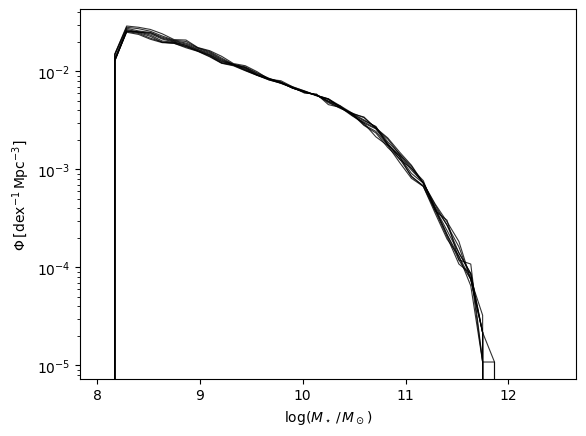

In [24]:
n_sams_plot = 30
rng = np.random.default_rng()
colors = ['black']*len(smf_arr)
for i in range(len(smf_arr)):
    if i==0:
        label='L-Galaxies SMF'
    else:
        label=None
    plt.plot(bins_log_mstar, smf_arr[i], lw=0.8, color=colors[i], alpha=0.8, label=label)
# if color_mode=='continuous':
#     ax = plt.gca()
#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
#     cb = plt.colorbar(sm, ax=ax, extend='max')
#     cbar_label = r'$\bar{\sigma}_\text{SMF}$,'+'\n distance b/w SAM & BGS SMFs'
#     cb.set_label(label=cbar_label, size=14)
        

# plt.plot(ms, psmf_bgs_mean, color='black', label=r'BGS pSMF')
# plt.fill_between(ms, 
#                  psmf_bgs_mean-psmf_bgs_std, 
#                  psmf_bgs_mean+psmf_bgs_std,
#                  color='black', alpha=0.3,
#                  )
# plt.fill_between(ms, 
#                  psmf_bgs_mean-2*psmf_bgs_std, 
#                  psmf_bgs_mean+2*psmf_bgs_std,
#                  color='black', alpha=0.1,
#                  )


# plt.scatter(m13ksf_log_m_msun, m13ksf_phi_Mpcn3, color='blue', marker='o', facecolor='None', s=8,
#                  label='Moustakas 2013')
    
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')
#plt.xlim(8.75, 12.5)

handles, labels = plt.gca().get_legend_handles_labels()
# if color_mode=='discrete':
#     handles.extend(handles_discrete)
# plt.legend(handles=handles, fontsize=12)
